In [ ]:
pip install scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

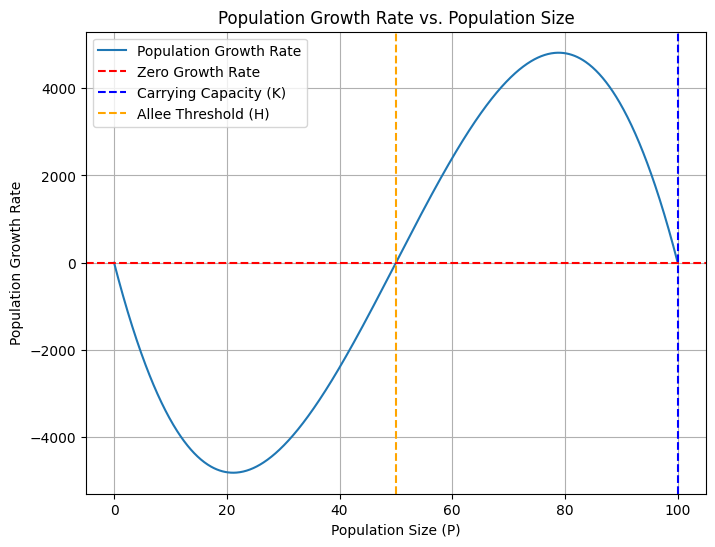

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
r = 0.1  # Intrinsic growth rate
K0 = 100  # Initial carrying capacity
a = 0.01  # Allee effect parameter

# Define the time span
t_span = (0, 100)  # Start and end time

# Define the time-dependent carrying capacity function
def K_func(t):
    return K0 * np.exp(-0.1 * t)  # Example: Carrying capacity decreases exponentially with time

# Define the time-dependent Allee threshold function
def H_func(t):
    return K_func(t) / 2  # Example: Allee threshold is half of the carrying capacity

# Define the population growth rate function with the Allee effect
def population_growth_rate(P, t):
    K = K_func(t)
    H = H_func(t)
    return r * P * (K - P) * (P - H)

# Generate the population size values
P_values = np.linspace(0, K0, 1000)

# Calculate the population growth rate at each population size
t = 0  # Time at which to evaluate the growth rate
P_growth_rate = population_growth_rate(P_values, t)
# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(P_values, P_growth_rate, label='Population Growth Rate')
plt.axhline(0, color='red', linestyle='--', label='Zero Growth Rate')
plt.axvline(K0, color='blue', linestyle='--', label='Carrying Capacity (K)')
plt.axvline(H_func(t), color='orange', linestyle='--', label='Allee Threshold (H)')
plt.xlabel('Population Size (P)')
plt.ylabel('Population Growth Rate')
plt.title('Population Growth Rate vs. Population Size')
plt.legend()
plt.grid(True)
plt.show()

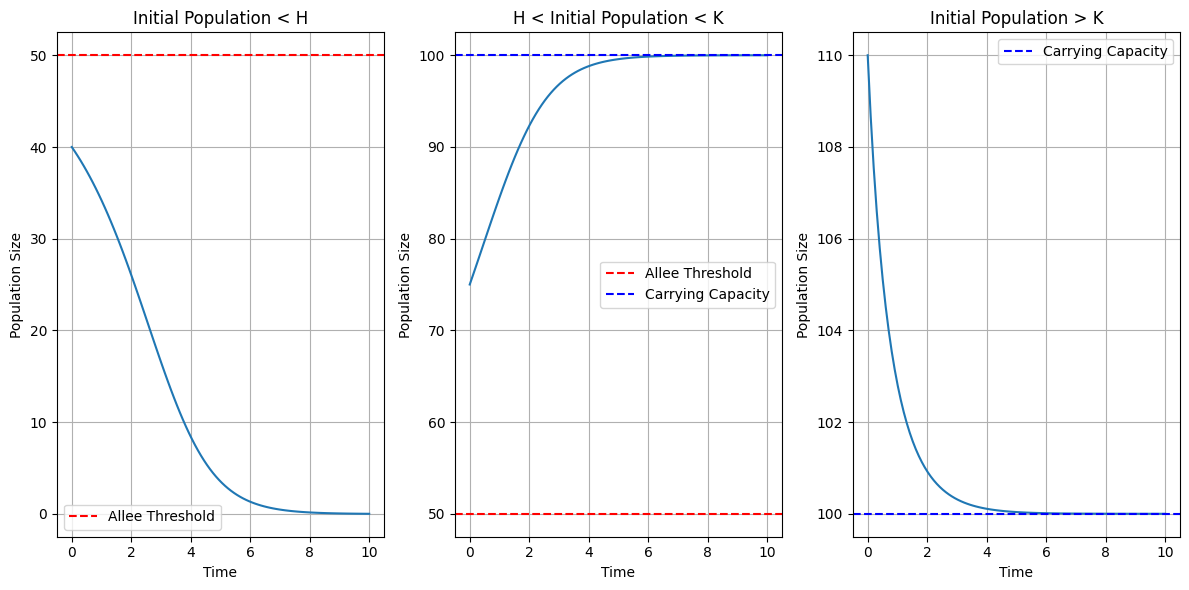

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
r = 0.02  # Intrinsic growth rate
K = 100  # Carrying capacity
H = 50  # Allee threshold

# Define the time span
t_span = (0, 10)  # Start and end time

# Define the population growth rate function
def population_growth_rate(P):
    return r * P * (1 - P / K) * (P - H)

# Define Euler's method for population size calculation
def euler_method(t_values, P0):
    dt = t_values[1] - t_values[0]
    P_values = np.empty_like(t_values)
    P_values[0] = P0

    for i in range(1, len(t_values)):
        P_values[i] = P_values[i-1] + population_growth_rate(P_values[i-1]) * dt

    return P_values

# Set the initial population values
P_values_1 = euler_method(t_values, H - 10)  # Initial value below H
P_values_2 = euler_method(t_values, (H + K) / 2)  # Initial value between H and K
P_values_3 = euler_method(t_values, K + 10)  # Initial value above K

# Plot the population size graphs
plt.figure(figsize=(12, 6))

# Graph for initial value below H
plt.subplot(1, 3, 1)
plt.plot(t_values, P_values_1)
plt.axhline(H, color='red', linestyle='--', label='Allee Threshold')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Initial Population < H')
plt.legend()
plt.grid(True)

# Graph for initial value between H and K
plt.subplot(1, 3, 2)
plt.plot(t_values, P_values_2)
plt.axhline(H, color='red', linestyle='--', label='Allee Threshold')
plt.axhline(K, color='blue', linestyle='--', label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('H < Initial Population < K')
plt.legend()
plt.grid(True)

# Graph for initial value above K
plt.subplot(1, 3, 3)
plt.plot(t_values, P_values_3)
plt.axhline(K, color='blue', linestyle='--', label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Initial Population > K')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-23-3958e281337d>:28: RuntimeWarning: overflow encountered in double_scalars
  K_derivative = P_derivative * P / K
<ipython-input-23-3958e281337d>:14: RuntimeWarning: overflow encountered in double_scalars
  return r * P * (1 - P / K) * (P - H)
<ipython-input-23-3958e281337d>:28: RuntimeWarning: invalid value encountered in double_scalars
  K_derivative = P_derivative * P / K


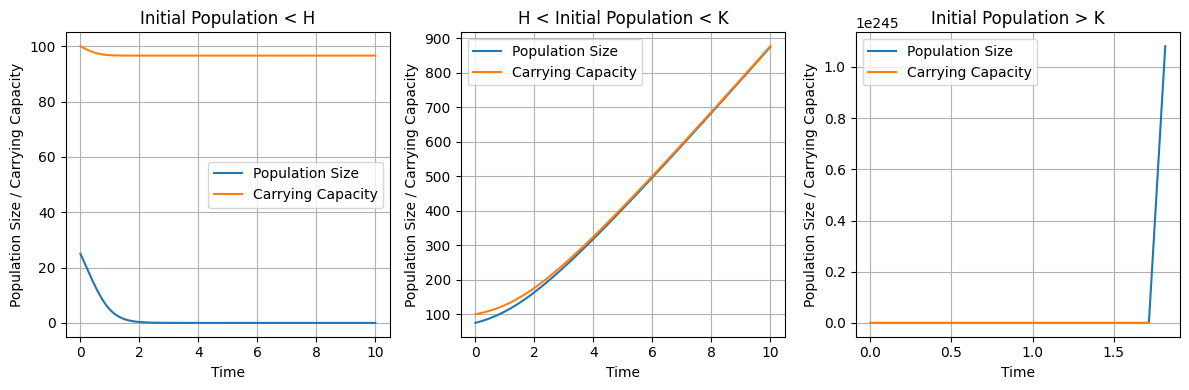

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
r = 0.05  # Intrinsic growth rate (lower value)
K0 = 100  # Initial carrying capacity
H = 50  # Allee threshold

# Define the time span
t_span = (0, 10)  # Start and end time

# Define the population growth rate function with Allee effect
def population_growth_rate(P, K):
    return r * P * (1 - P / K) * (P - H)

# Define Euler's method for population size and carrying capacity calculation
def euler_method(t_values, P0, K0):
    dt = t_values[1] - t_values[0]
    P_values = np.empty_like(t_values)
    K_values = np.empty_like(t_values)
    P_values[0] = P0
    K_values[0] = K0

    for i in range(1, len(t_values)):
        P = P_values[i-1]
        K = K_values[i-1]
        P_derivative = population_growth_rate(P, K)
        K_derivative = P_derivative * P / K
        P_values[i] = P + P_derivative * dt
        K_values[i] = K + K_derivative * dt

    return P_values, K_values

# Generate time values
t_values = np.linspace(t_span[0], t_span[1], 100)

# Set the initial population size and carrying capacity
P0_below_H = 25
K0_below_H = K0
P0_between_H_K = 75
K0_between_H_K = K0
P0_above_K = 150
K0_above_K = K0

# Calculate the population size and carrying capacity using Euler's method
P_values_below_H, K_values_below_H = euler_method(t_values, P0_below_H, K0_below_H)
P_values_between_H_K, K_values_between_H_K = euler_method(t_values, P0_between_H_K, K0_between_H_K)
P_values_above_K, K_values_above_K = euler_method(t_values, P0_above_K, K0_above_K)

# Plot the population size and carrying capacity graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t_values, P_values_below_H, label='Population Size')
plt.plot(t_values, K_values_below_H, label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population Size / Carrying Capacity')
plt.title('Initial Population < H')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_values, P_values_between_H_K, label='Population Size')
plt.plot(t_values, K_values_between_H_K, label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population Size / Carrying Capacity')
plt.title('H < Initial Population < K')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t_values, P_values_above_K, label='Population Size')
plt.plot(t_values, K_values_above_K, label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population Size / Carrying Capacity')
plt.title('Initial Population > K')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
